# **Retail Store Sales Analysis**                                

### About the dataset
The dataset I will use for the project is a dirty dataset from Kaggle representing sales transactions from a retail store. The dataset includes eight product categories with 25 items per category, each having static prices. It is designed to simulate real-world sales data, including intentional "dirtiness" such as missing or inconsistent values. In addition, exploratory data analysis (EDA) will be performed to analyze sales trends, category performance and customer behaviour.

### Data Dictionary

The retail store dataset contains the following variables:

**Transaction ID**: A unique identifier for each transaction.

**Customer ID**: A unique identifier for each customer.

**Category ID**: The category of the purchased item.

**Item**: The name of the purchased item.

**Price per unit**: The static price of a single unit of the item.

**Quantity**:  The quantity of the item purchased.

**Total spent**: The total amount spent on the transaction. Calculated as Quantity * Price Per Unit

**Location**:The location where the transaction occurred. May contain missing or invalid values.

**Transaction Date**:The transaction's date.

**Discount applied**: Indicates if a discount was applied to the transaction.

## **Loading and discovering dataset**

In [1]:
#Importing all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connecting to my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading dataset from Drive and assigning it to a new variable retail
retail=pd.read_csv('/content/drive/MyDrive/retail_store_sales.csv')

In [4]:
#Checking the first 5 rows
retail.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [5]:
#display dataset dimension (rows, columns)
retail.shape
print(f"The dataset has {retail.shape[0]} rows and {retail.shape[1]} columns.")

The dataset has 12575 rows and 11 columns.


In [6]:
#Checking variables data types
retail.dtypes

,0
Transaction ID,object
Customer ID,object
Category,object
Item,object
Price Per Unit,float64
Quantity,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


In [7]:
#print the number of unique items in the dataset
unique_items=retail['Item'].nunique()
print(f"The dataset contains {unique_items} unique items.")

The dataset contains 200 unique items.


In [8]:
#show unique customers
unique_customers=retail['Customer ID'].nunique()
print(f"The dataset contains the transaction of {unique_customers} unique customers.")

The dataset contains the transaction of 25 unique customers.


In [9]:
#creating a function that returns unique values of a particular column
def unique_values(df, column_name):
    unique_values = df[column_name].unique()
    return unique_values


In [10]:
#displaying unique product categories, transaction locations and payment methods
categories=unique_values(retail, 'Category')
t_location=unique_values(retail, 'Location')
payment_methods=unique_values(retail, 'Payment Method')
print(categories)
print(t_location)
print(payment_methods)

['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']
['Online' 'In-store']
['Digital Wallet' 'Credit Card' 'Cash']


The Category column contains 8 distinct categories.
Transactions are made either Online or In-store.
Customers paid for items either with their digital wallet, credit card or cash.

## **Data cleaning and Preparation**

In this section, I will clean the retail dataset and make it ready for analysis. I will look for missing values in the columns and fill/replace those values. I'll also check for duplicates and make other necessary transformations.

In [11]:
#Checking columns with null values
retail.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


5 columns (Item, PPU, Quantity, Total spent, Discount Applied) have numerous null values. Total Spent and Quantity  have the exact same number of null values while Price per Unit has a similar number, which makes sense considering  Total Spent is calculated based on the other two columns.

### Price column

In [12]:
#checking null values for 'PPU' column
price_null=retail[retail['Price Per Unit'].isnull()]
price_null

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,NaN,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True


In [13]:
#on price_null dataframe, filter rows that do not have missing values in Quantity and Total
filtered_rows=price_null.dropna(subset=['Quantity', 'Total Spent'])
filtered_rows

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,NaN,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True


In [14]:
#for 'Price per Unit' column, divide  Total spent  by  Quantity
filtered_rows['Price Per Unit']=filtered_rows['Total Spent']/filtered_rows['Quantity']
filtered_rows

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,20.0,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,6.5,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,27.5,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,35.0,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,24.5,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,6.5,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,21.5,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,20.0,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,26.0,1.0,26.0,Credit Card,Online,2023-01-31,True


In [15]:
#updating PPU column in retail df with PPU column of df 'filtered_rows'
retail.update(filtered_rows)

In [16]:
#create a function that I will use to check columns null values
def check_col_nulls(df, column_name):
    null_count = df[column_name].isnull().sum()
    return null_count

In [17]:
#checking null values PPU column after update
check_col_nulls(retail,'Price Per Unit')

0

### Item column

In [18]:
#checking a couple rows where 'item' column is not null
item_not_null=retail[retail['Item'].notnull()]
item_not_null.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [19]:
#subset a specific item from item_not_null df
item_not_null[item_not_null['Item']=='Item_10_PAT'].head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
126,TXN_5243520,CUST_13,Patisserie,Item_10_PAT,18.5,5.0,92.5,Cash,In-store,2024-05-16,False
219,TXN_5846723,CUST_05,Patisserie,Item_10_PAT,18.5,3.0,55.5,Cash,In-store,2024-01-28,False
555,TXN_1099045,CUST_21,Patisserie,Item_10_PAT,18.5,6.0,111.0,Digital Wallet,Online,2022-09-12,NaN
1965,TXN_6812056,CUST_10,Patisserie,Item_10_PAT,18.5,10.0,185.0,Cash,In-store,2024-07-03,True


As mentionned in the introduction and verified with the the product Item_10_PAT, the prices of each product is static. Therefore, to fill null values in the item column for a particular row, we need a code that will identify other rows with the same item category and price and then replace the null value with the corresponding item.

In [20]:
# Creating a dictionary mapping unique Category and Price Per Unit combinations to Item values
item_mapping = {}
for index, row in item_not_null.iterrows():
    key = (row['Category'], row['Price Per Unit'])
    if key not in item_mapping:
        item_mapping[key] = row['Item']


In [21]:
# Fill null values in the 'Item' column using the mapping
for index, row in retail[retail['Item'].isnull()].iterrows():
    key = (row['Category'], row['Price Per Unit'])
    if key in item_mapping:
        retail.loc[index, 'Item'] = item_mapping[key]

In [22]:
#check 'Item' nulls
check_col_nulls(retail,'Item')

0

### Quantity

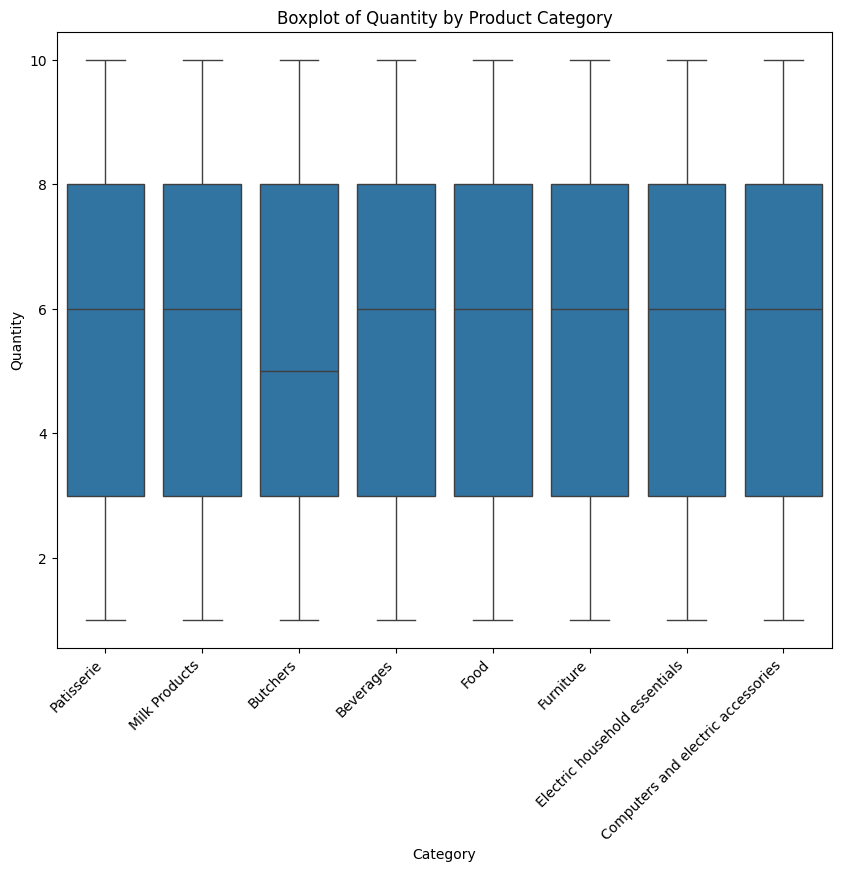

In [23]:
#creating a boxplot of 'Quantity' across product categories
plt.figure(figsize=(10, 8))
sns.boxplot(data=retail, x='Category', y='Quantity')
plt.title("Boxplot of Quantity by Product Category")
plt.xticks(rotation=45, ha='right')
plt.show()

* The median line is consistent across most catgeories (around 6) except "Butchers".

*  The IQR appears is the same across all categories, indicating that most sales quantities fall within a similar range.

* There are no outliers for in each specific category.

* Quantity values range from 1 to 10.




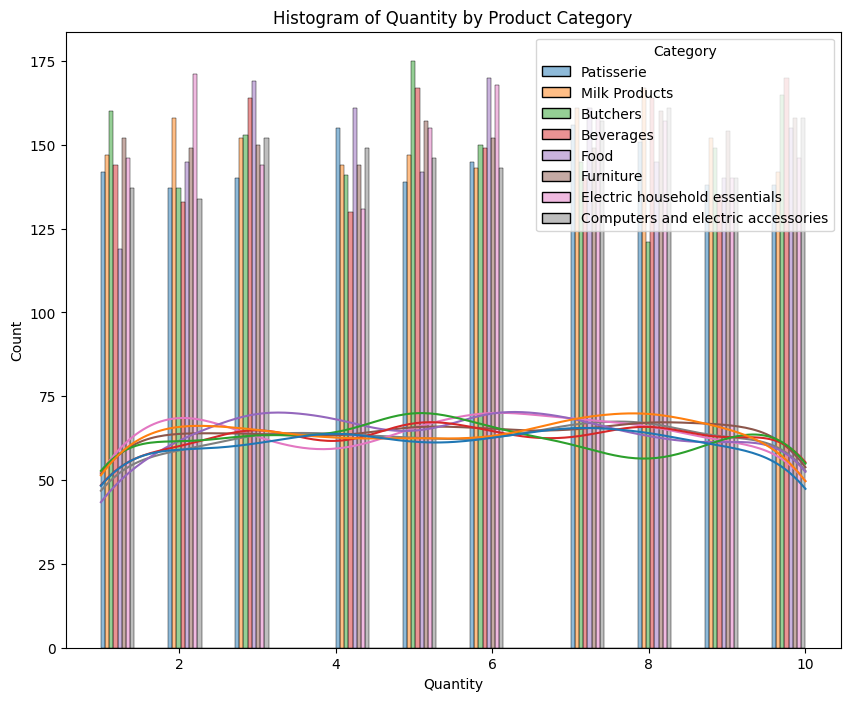

In [24]:
#histogram showing distribution of Quantity by category
plt.figure(figsize=(10, 8))
sns.histplot(data=retail, x='Quantity', hue='Category', kde=True, multiple='dodge')
plt.title("Histogram of Quantity by Product Category")
plt.show()

* The distribution of Quantity remains fairly uniform within each product category, just like the overall distribution. Therefore, there is no need to impute Quantity column based on specifc category.

* In addition, quantity values are discrete and the distribution doesn't follow a normal or skewed shape, so it doesn't make sense to use mean or median.

* To impute the Quantity column, I will therefore use the mode.It should not drastically change the distribution of the column since there are many null rows (604) compared to the total rows (12575). Random sampling would also have been a good option but it may change the results of my analysis everytime I run the notebook.



In [25]:
#fill null values of 'Quantity' using mode from existing data
retail['Quantity'].fillna(retail['Quantity'].mode()[0], inplace=True)

<ipython-input-25-98800e50c5aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail['Quantity'].fillna(retail['Quantity'].mode()[0], inplace=True)


In [26]:
#column check
check_col_nulls(retail,'Quantity')

0

### Total Spent

For NAs in the "Total Spent" column, I'll simply multiply the Quantity with the Price per Unit.

In [27]:
#fill null values of TS column
retail['Total Spent'].fillna( retail['Price Per Unit'] * retail['Quantity'], inplace=True)

<ipython-input-27-6a99ae15f25c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail['Total Spent'].fillna( retail['Price Per Unit'] * retail['Quantity'], inplace=True)


In [28]:
check_col_nulls(retail,'Total Spent')

0

### Discount Applied

In [29]:
#replacing null values of column with Unknown
retail['Discount Applied'].fillna('Unknown', inplace=True)

<ipython-input-29-83cbdc6ecb14>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail['Discount Applied'].fillna('Unknown', inplace=True)


In [30]:
check_col_nulls(retail,'Discount Applied')

0

### Transaction

In [31]:
#Converting column 'Transaction' data type into a date
retail['Transaction Date'] = pd.to_datetime(retail['Transaction Date'])
print(retail['Transaction Date'].dtypes)

datetime64[ns]


In [32]:
#Use Transaction Date column to create new columns Month and Year
#Can be useful to analyse monthly or yearly sales

#creating Month Column
retail['T_Month']=retail['Transaction Date'].dt.month

#creating year column
retail['T_Year']=retail['Transaction Date'].dt.year

#checking the columns
retail.loc[0:5,['T_Month','T_Year']]

,T_Month,T_Year
0,4,2024
1,7,2023
2,10,2022
3,5,2022
4,10,2022
5,11,2023


### Duplicates and column names


In [33]:
#checking for duplicates in the retail df
retail.duplicated().sum()

0

The retail dataset does not contain any duplicate rows.

In [34]:
#renaming columns that have a space in their name

#assigning new names to current column names in a dictionary
#key has "old_name" while value has "new name"
new_names={'Transaction ID': 'Transaction_ID', 'Customer ID':'Customer_ID', 'Payment Method':'Payment_Method',
           'Transaction Date':'Transaction_Date',
           'Discount Applied':'Discount_Applied',
           'Total Spent':'Total_Spent', 'Price Per Unit':'Price_Per_Unit'}

#Updating the retail df with new names
retail.rename(columns=new_names, inplace=True)

In [35]:
#check columns to see updated names
retail.columns

Index(['Transaction_ID', 'Customer_ID', 'Category', 'Item', 'Price_Per_Unit',
       'Quantity', 'Total_Spent', 'Payment_Method', 'Location',
       'Transaction_Date', 'Discount_Applied', 'T_Month', 'T_Year'],
      dtype='object')

In [36]:
#move 'Discount Applied' column position at the end

#extracting column data from retail df
discount_col=retail.pop('Discount_Applied')
#inserting it at the end
retail.insert(len(retail.columns), 'Discount_Applied', discount_col)

#check columns index positions
retail.columns

Index(['Transaction_ID', 'Customer_ID', 'Category', 'Item', 'Price_Per_Unit',
       'Quantity', 'Total_Spent', 'Payment_Method', 'Location',
       'Transaction_Date', 'T_Month', 'T_Year', 'Discount_Applied'],
      dtype='object')

## **Exploratory Data Analysis**

Now that the dataset is clean ready, I can move to the exploratory data analysis. In this phase, I'll explore data to get insights about store products, sales performance and customer trends & patterns. To do so, I will create different visualizations and interpret them.

In [37]:
#get unique values of year column
unique_years=unique_values(retail, 'T_Year')
#sorting list
unique_years.sort()
print(f"The retail dataset contains data from the following years: {unique_years}.")

The retail dataset contains data from the following years: [2022 2023 2024 2025].


### Top customers

In [38]:
#find the 5 best customers in terms of Total Spent
top_5_customers=retail.groupby('Customer_ID')['Total_Spent'].sum().nlargest(5)

In [39]:
#top 5 customers money spent per year

#step 1:filter data for top 5 customers

# similar code to top_5_customers but retrieving row ids using index
top_5_customer_ids = retail.groupby('Customer_ID')['Total_Spent'].sum().nlargest(5).index

# Filter the retail df to include only transactions from top 5 customers
top_5_customer_data = retail[retail['Customer_ID'].isin(top_5_customer_ids)]

In [40]:
#step 2: Grouping and aggregation
yearly_spending = top_5_customer_data.groupby(['Customer_ID', 'T_Year'])['Total_Spent'].sum().reset_index()

#filter data to exclude 2025 (low amount of values)
yearly_spending=yearly_spending[yearly_spending['T_Year']<2025]

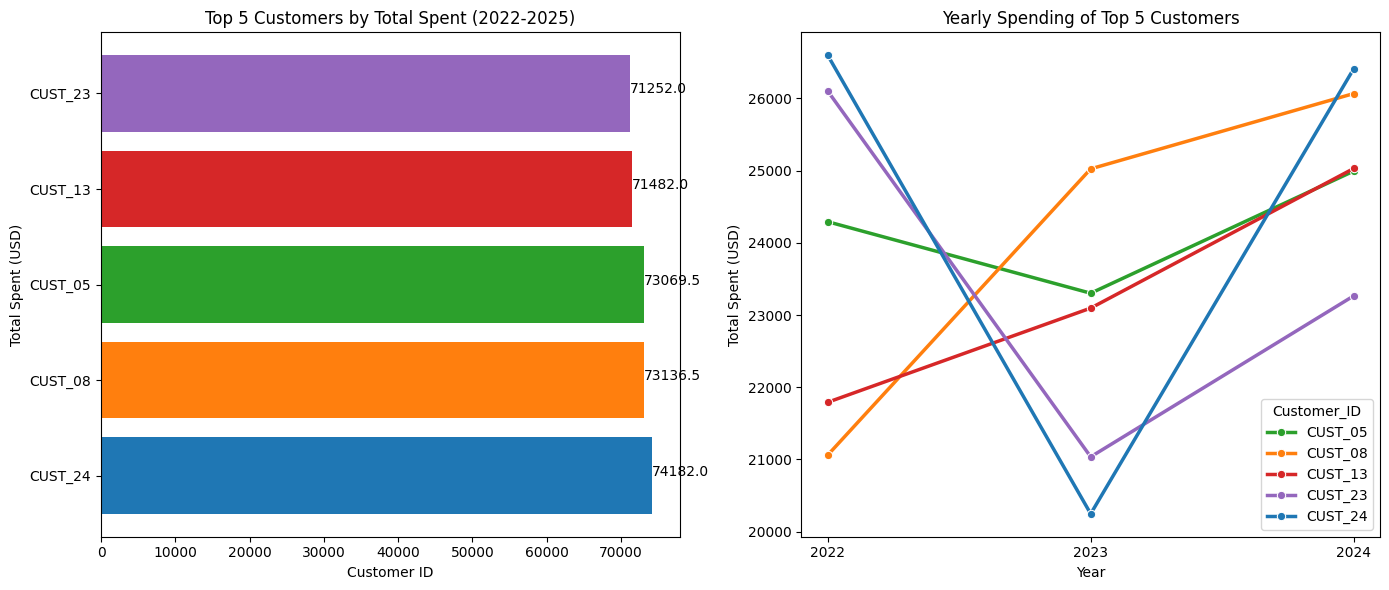

In [41]:
#visualizing  top 5 customers and yearly spending side by side using subplot

#Creating a figure and a set of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

unique_customers = top_5_customers.index.tolist()  # Extracting top 5 customer IDs
palette = sns.color_palette("tab10", len(unique_customers))  # Generating distinct colors for the unique customer list (5 colours)
color_map = dict(zip(unique_customers, palette))  # Map each customer ID to a color {'Customer_ID': 'Color'}

# Plot 1: Top 5 Customers by Total Spent
x = top_5_customers.index
y = top_5_customers.values
axes[0].barh(x, y,color=[color_map[cust] for cust in x])

#Annote each bar with its corresponding value
for index, value in enumerate(y):
    axes[0].text(value, index, str(value))

# Using axes[0] to plot on the first subplot
axes[0].set_title("Top 5 Customers by Total Spent (2022-2025)")
axes[0].set_xlabel("Customer ID")
axes[0].set_ylabel("Total Spent (USD)")

# Plot 2: Yearly Spending of Top 5 Customers

#set year column as string to avoid having continuous values on x-axis
yearly_spending['T_Year'] = yearly_spending['T_Year'].astype(str)

sns.lineplot(data=yearly_spending, x='T_Year', y='Total_Spent', hue='Customer_ID', linewidth=2.5, marker='o', ax=axes[1],palette=color_map)

# Using axes[1] for display second subplot
axes[1].set_title("Yearly Spending of Top 5 Customers")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Spent (USD)")

# Adjusting layout and displaying the plot

plt.tight_layout()  # preventsoverlapping of plots
plt.show()

* On the horizontal bar, we can see that **CUST_24** is the customer who generated the most revenue for the retail store over the period 2022-2025, with **74,182** USD spent. On the right graph, we can see that he is the customer who spent the most money in 2022 and 2024 as he spent over 25,000 USD.

* He is followed by CUST_08 in second (73,136.50 USD), who increase his spending year-on-year (excluidng 2025).

* CUST_05 is third (73,069.50 USD) in Total Spent over the 4 years followed by CUST_13 (71,482 USD)  and CUST_23 (71,252 USD) in 4th and 5th respectively.

* Like CUST_08, CUST_13 spending increased year-on-year.

### Category insights

In [42]:
# creating a df that aggregates quantity bought by category and month
quantity_cm= retail.groupby(['Category', 'T_Month'])['Quantity'].sum().unstack()

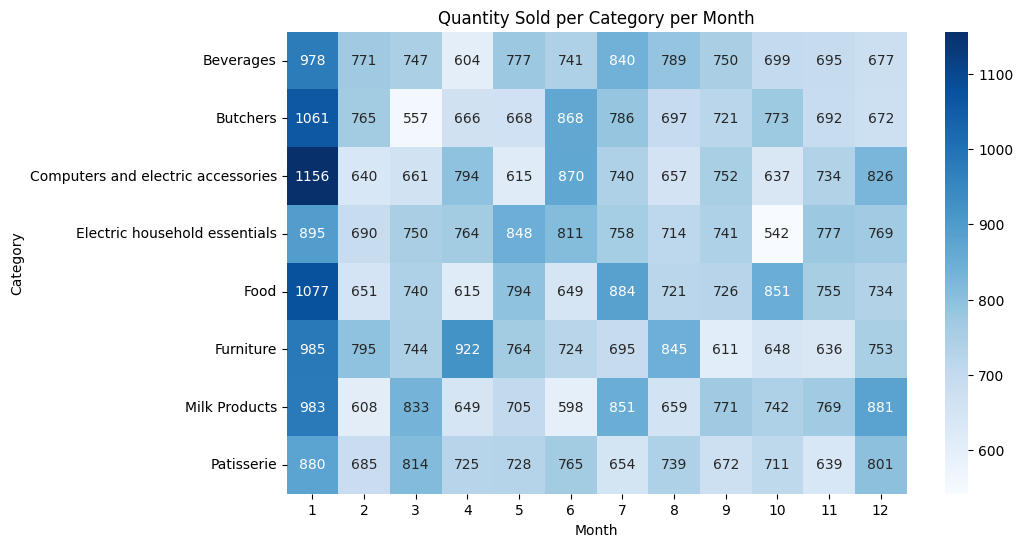

In [43]:
#heatmap of quantity sold per category and month
plt.figure(figsize=(10, 6))
sns.heatmap(quantity_cm, cmap="Blues", annot=True, fmt=".0f")
plt.title("Quantity Sold per Category per Month")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

**Seasonal trends and Monthly fluctuations**

*   **January** is the month with the highest sales *across all the categories*.
*  The best-selling category in January is *"Computer and Electric Accessories" * with **1156** products sold.
* After high sales in January, there is a dip in sales for all categories in February, which is understandable. Most of the categories (5 out of 8) have an increase in sale again im March.
* August is another where most of the categories (6 out 8) see a dip in quantity sold.

**Stable vs Fluctuating Categories**

* **Beverage** and **Patisserie** categories maintain a relatively stable trend with minor variations.

* **Milk Products, Computer & electric accessories and Butchers** are categories with a lot of fluctuations (month-to month increase/decrease) and some months have significantly higher sales than others.

**Category_Specific Observations**

* **Furniture** category has a sales peak in April (922) but decreases in the following months before climbing up again in August.

* **Electric household essentials** has high sales from May to July, paticularly in May in which it is the highest selling catgeory.

* There are high sales in **July** for **Beverages, Milk Products and Food**, possibly due seasonal demand (summer).

* **Milk products, Patisserie, Computer and electric accessories** have a high demand in December, indicating seasonal demand (Christmas period).



### Location

In [44]:
# check online vs in-store sales
location_counts = retail.groupby('Location')['Transaction_ID'].count()

In [45]:
#calculate the proportion in percentage (to use in visualization)
location_proportions = (location_counts / location_counts.sum())*100

In [46]:
#filter retail dataframe to see sales by location
location_sales = retail.groupby('Location')['Total_Spent'].sum()
#store sales as a percentage
location_sales_percentage = (location_sales / location_sales.sum())*100

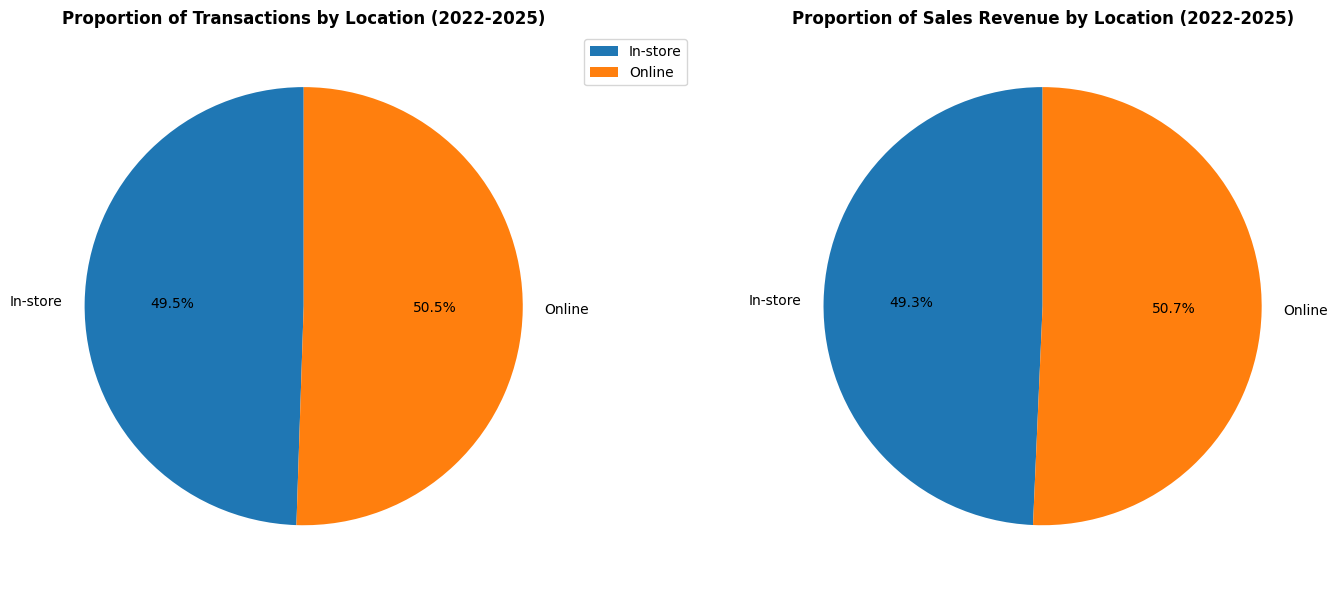

In [47]:
#creating 2 side-by-side pie charts (Transaction proportion by Location and Sales proportion by location)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Online vs In-Store Proportion
axes[0].pie(location_proportions, labels=location_proportions.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Proportion of Transactions by Location (2022-2025)", fontweight='bold')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))


#Plot:2 Online vs In-store sales proportion
axes[1].pie(location_sales_percentage, labels=location_sales_percentage.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Proportion of Sales Revenue by Location (2022-2025)", fontweight='bold')
plt.tight_layout()
plt.show()

**Proportion of Sales Transaction**

***Online*** transactions account for **50.5%** of store's transactions and while ***In-store*** transactions account for **49.5%**. This tells us that the store almost sells as much items in-store that in does online. The difference is minimal.

**Proportion of sales revenue**

***In-store*** sales represent **49.3%** of the store's gross revenue for the period 2022-2025 while ***Online*** sales accounted for ***50.7%***. It is normal for the online revenue to be slighlty higher than in_store one since more transactions are made online. But we can also imply with these numbers that the location has no real impact on the quantity bought, meaning customers don't necessarily buy more whether they're online or at physical stores.

### Location-Category relationship

In [48]:
# Aggregating sales by category and location
category_location_sales = retail.groupby(['Category', 'Location'])['Quantity'].sum().unstack()

<Figure size 1000x600 with 0 Axes>

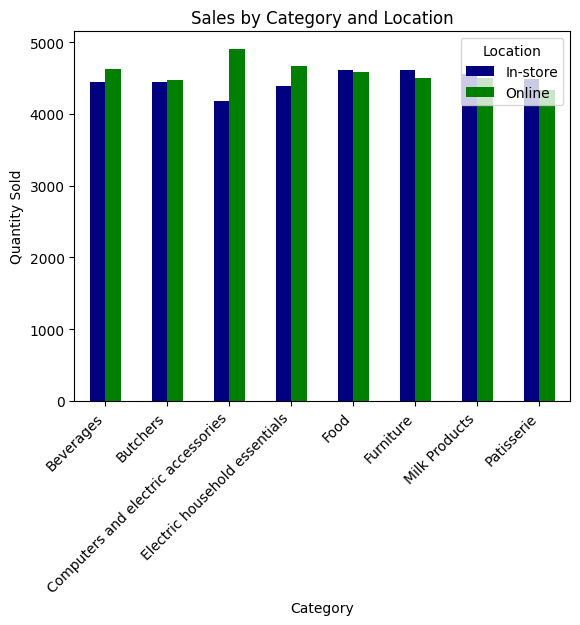

In [49]:
#Visualizing relationship with a bar plot
plt.figure(figsize=(10, 6))
category_location_sales.plot(kind='bar',color=['navy','green'])
plt.title("Sales by Category and Location")
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.legend(title="Location")
plt.xticks(rotation=45, ha='right')
plt.show()

The **Computers and electric accessories** is the only category which shows a significant difference between online sales and in-store sales. The category has higher online sales, which suggests that customers prefer to search and buy these items of this category online.

The categories **Furniture, Milk Products, Patisserie,Food** have slightly higher in-store sales than online.

## **SQL Alchemy**

In this section, I'll attempt to get more specific details in my dataframe by using SQL queries. I'll use the SQL Alchemy package to create a database and store my retail dataframe in it. I'll then create queries and read them using pandas' read_sql_query function.

### Creating Database and Storing Dataframe

In [50]:
#installing SQL Alchemy package
!pip install sqlalchemy --quiet

In [51]:
#retrieving current working directory
import os
os.getcwd()

'/content'

In [52]:
#import create_engine funtion
from sqlalchemy import create_engine

In [53]:
#creating an SQLite database engine
#naming my database retail
engine=create_engine('sqlite:///retail.db')

In [54]:
#storing my retail dataframe in database
# naming my table 'customer transactions'
retail.to_sql('customer_transactions', engine, if_exists='replace', index=False)

12575

In [55]:
#DB query check
retail_db=pd.read_sql_query('SELECT * FROM customer_transactions', engine)
retail_db.head()

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date,T_Month,T_Year,Discount_Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08 00:00:00.000000,4,2024,1
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23 00:00:00.000000,7,2023,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05 00:00:00.000000,10,2022,0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07 00:00:00.000000,5,2022,Unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02 00:00:00.000000,10,2022,0


### Insights queries

In [56]:
#Query 1: What is the item with the price per unit and in which category is it?

query="""
SELECT Item, Category, MAX(Price_Per_Unit) as PPU
FROM customer_transactions
"""
max_price= pd.read_sql_query(query, engine)

max_price

,Item,Category,PPU
0,Item_25_FUR,Furniture,41.0


**Item_25_FUR** is the item with the highest price, sold at 41.00 USD the unit.

In [57]:
#Query 2: CUST_24 is the best customer in terms of revenue generated.
#On which category has he spent the most and how much has he spent per category?
query2= """
SELECT Category, SUM(Total_Spent) as Total_Spent
FROM customer_transactions
WHERE Customer_ID= 'CUST_24'
GROUP BY Category
ORDER BY Total_Spent DESC
"""
best_customer_cat=pd.read_sql_query(query2, engine)

best_customer_cat

,Category,Total_Spent
0,Food,10680.0
1,Patisserie,10474.0
2,Furniture,9982.5
3,Electric household essentials,9599.0
4,Butchers,9367.0
5,Milk Products,8548.0
6,Beverages,7778.5
7,Computers and electric accessories,7753.0


Over the period 2022-2025, **CUST_24** spent the most on **Food**, with 10,680 USD spent. He also spent more than 10,000 on **Patisserie** (10,474) and close to 10,000 on Furniture (9,982.5).

In [58]:
# Q3: What are the top 3 items in the Food category that Cust_24 buys the most?
query3= """
SELECT Item, COUNT(*) as Number_of_purchases, SUM(Quantity) as Quantity_bought
FROM customer_transactions
WHERE Customer_ID= 'CUST_24' AND Category=='Food'
GROUP BY Item
ORDER BY Number_of_purchases DESC
LIMIT 3;
"""
best_customer_item=pd.read_sql_query(query3, engine)

best_customer_item

,Item,Number_of_purchases,Quantity_bought
0,Item_17_FOOD,12,57.0
1,Item_20_FOOD,10,45.0
2,Item_25_FOOD,6,46.0


 **Item_17_FOOD** is the product that **CUST_24** bought the most with 12 separate purchases and 57 units bought in Total. In addition he bought **Item_20_FOOD** 10 times and **Item_25_FOOD** 6 times.

In [59]:
#Q4: CUST_08 is the second highest spender in the retail store from the period 2022-2025.
#How many transactions did he make online vs in-store?
query4= """
SELECT location, COUNT(*) as Number_of_transactions, SUM (Total_Spent) as Revenue
FROM customer_transactions
WHERE Customer_Id='CUST_08'
GROUP BY location
"""
Customer_location=pd.read_sql_query(query4, engine)

Customer_location

,Location,Number_of_transactions,Revenue
0,In-store,250,34585.0
1,Online,283,38551.5


**CUST_08** made more transactions online (283) than in-store (250).

In [60]:
# Q5: How many customer transactions are made each year?

query5= """
SELECT T_Year, COUNT(*) as Num_transactions
FROM customer_transactions
GROUP BY T_Year
ORDER BY T_Year
"""
transactions_per_year=pd.read_sql_query(query5, engine)

transactions_per_year

,T_Year,Num_transactions
0,2022,4134
1,2023,3987
2,2024,4241
3,2025,213


The year **2024** is the year with the most transactions (**4241**), followed by the year 2022, where the retail store processed **4134** transactions. There was a slight drop in the number of transactions in the following year, with **3987** customer transactions. There are **235** transactions so far for 2025.

In [61]:
#Q6: What is the the retailer's gross revenue per year (excluding 2025)?
query6= """
SELECT T_Year, SUM(Total_Spent) as Total_Revenue
FROM customer_transactions
WHERE T_Year<2025
GROUP BY T_Year
ORDER BY T_Year
"""
Revenue_per_year=pd.read_sql_query(query6, engine)

Revenue_per_year

,T_Year,Total_Revenue
0,2022,560784.5
1,2023,531627.0
2,2024,573906.0


* In the year 2022, the retail store made **560,784.50** USD in gross revenue.

* The gross revenue decreased in 2023 to **531,627** USD (-5% compared to 2022). This can be due to the fact that they were less transactions that year. An assumption we can make is that they might have been high inflation that year and it affected customers' purchasing power.

* The gross revenue in 2024 jumped to **573,906** USD (+8% compared to 2023).

In [62]:
#Q7: which item category has the highest average sales over the period 2022-2024
query7= """
SELECT Category, AVG(Total_Spent) as AVG_sales
FROM customer_transactions
WHERE T_Year<2025
GROUP BY Category
ORDER BY Avg_sales DESC
"""
Avg_sales_per_category=pd.read_sql_query(query7, engine)

Avg_sales_per_category

,Category,AVG_sales
0,Butchers,143.223266
1,Electric household essentials,140.465517
2,Beverages,136.011032
3,Computers and electric accessories,134.210026
4,Food,133.855255
5,Patisserie,133.353019
6,Furniture,133.078494
7,Milk Products,124.183857


**Butchers** has the category with the highest sales average with a value of **~143.22 USD**.

## **Findings and Recommendations**

After thoroughly analyzing the retail store, I have derived key findings and can provide actionable recommendations to the store.

**Best Customers**

I have identified the top 5 customers in terms of revenue brought to the business over the period 2022-2025. With SQL, I have also identified the best customer preferred category, item and his frequency of purchases.

**Recommendation**: Offer personalized discounts or promotions on top customers preferred products to reward and retain them. Moreover, the retail can also provide personalized product recommendations from categories customers like to shop in.

**Location**

I have found that the ratio of transactions per location (online vs in-store) is almost equal, with online transactions accounting for 50.5% of transactions vs 49.5 % for in-store ones. In addition, the ratios for the revenue per location are very similar. The retail store should maintain efforts to keep this balance unless it desires a strategy shift (e.g. move towards digital).

**Category insights**

**Per location**

I have discovered that the category **Computer and electronic accessories** is the outstanding category which has higher online sales than in-store.The retailer should focus on promoting items from the category online and also enhance their logistics to deliver these items the fastest way possible.

**Monthly trends**

I have gathered a lot of insights on how categories of products sold per month.

I have identfied that January is the month in the year where customer spending is at its highest. The store should stock-up on **all** categories but particularly **Computer and Electronic accessories** and **Food**, categories with the highest month.

Furthermore, I have also discovered that the months of **February** and **August** had a low level of sales. The retail store should introduce discounts or bundling promotions in these months which can help maintain revenue.

Lastly, I have found that some categories such as **Milk Products** and **Patisserie** , **Furniture** and a few others were seasonal. The business should consider running sales and marketing campaigns during these periods.




